# Rain in Australia - predict next-day rain in Australia
https://www.kaggle.com/jsphyg/weather-dataset-rattle-package 

Zbiór danych zawiera około 10 lat codziennych obserwacji pogody z wielu miejsc w Australii.  
Zmienna RainTomorrow jest zmienną docelową do przewidywania. Oznacza ona - czy padało następnego dnia.  
Kolumna ma wartość Yes jeśli deszcz tego dnia wyniósł 1mm lub więcej.   

In [1]:
import numpy as np
import pandas as pd

# Wczytujemy plik "weatherAUS.csv" przy użyciu bilioteki pandas
df = pd.read_csv('data/weatherAUS.csv')

# Wypisujemy wymiary wczytanego pliku
print('Wymiary wczytanego pliku:', df.shape)

# Wypisujemy pierwsze 5 wierszy DataFrame.
df[0:5]

Wymiary wczytanego pliku: (142193, 24)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [2]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [3]:
# Sprawdźmy które kolumny mają dużo "missing values".
# Żeby dobrze zrozumieć co się dzieje w tej linijce warto wypisać sobie poszczególne
# składowe kolejno, czyli:
# df.isnull()
# df.isnull().sum()
df.isnull().sum().sort_values()

Date                 0
RISK_MM              0
RainTomorrow         0
Location             0
MaxTemp            322
MinTemp            637
Temp9am            904
WindSpeed9am      1348
Rainfall          1406
RainToday         1406
Humidity9am       1774
WindSpeed3pm      2630
Temp3pm           2726
Humidity3pm       3610
WindDir3pm        3778
WindGustSpeed     9270
WindGustDir       9330
WindDir9am       10013
Pressure3pm      13981
Pressure9am      14014
Cloud9am         53657
Cloud3pm         57094
Evaporation      60843
Sunshine         67816
dtype: int64

In [4]:
# to samo co wyżej wyrażone procentowo
null_cnt = df.isnull().sum().sort_values(ascending=False)
np.round(null_cnt/df.shape[0], 2)

Sunshine         0.48
Evaporation      0.43
Cloud3pm         0.40
Cloud9am         0.38
Pressure9am      0.10
Pressure3pm      0.10
WindDir9am       0.07
WindGustDir      0.07
WindGustSpeed    0.07
WindDir3pm       0.03
Humidity3pm      0.03
Temp3pm          0.02
WindSpeed3pm     0.02
Humidity9am      0.01
RainToday        0.01
Rainfall         0.01
WindSpeed9am     0.01
Temp9am          0.01
MinTemp          0.00
MaxTemp          0.00
RISK_MM          0.00
Date             0.00
Location         0.00
RainTomorrow     0.00
dtype: float64

In [5]:
df.RISK_MM.value_counts()

0.0      91077
0.2       8762
0.4       3781
0.6       2591
0.8       2055
         ...  
134.8        1
84.4         1
157.6        1
166.8        1
69.0         1
Name: RISK_MM, Length: 681, dtype: int64

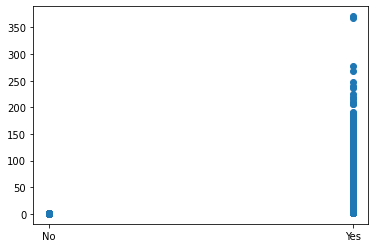

In [6]:
import matplotlib.pyplot as plt

plt.scatter(df.RainTomorrow, df.RISK_MM)

In [7]:
# badamy corelację Pearsona - RISK_MM jest ściśle powiązane z 'RainTomorrow',
# Na stronie https://www.kaggle.com/jsphyg/weather-dataset-rattle-package możemy przeczytać definicję RISK_MM:
# RISK_MM - The amount of rain. A kind of measure of the "risk".

df[["RainTomorrow", "RISK_MM"]].corr()

,RISK_MM
RISK_MM,1.0


In [10]:
df.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [11]:
df.Sunshine.value_counts()

0.0     2308
10.7    1087
11.0    1078
10.8    1058
10.5    1018
        ... 
14.0      15
14.1       6
14.3       4
14.2       2
14.5       1
Name: Sunshine, Length: 145, dtype: int64

In [12]:
# Usuwamy 4 kolumny którym brakuje ponad połowy danych
# Usuwamy też, "location", bo chcemy aby nasz model przewidywał dane nizależnie dla całej Australii

df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location', 'RISK_MM', 'Date'], axis=1)

# Wypisujemy wymiary "df" po usunięciu 7 kolumn, z 24 zostało ich 17
df.shape

(142193, 17)

In [13]:
# Zamieniamy "Yes" i "No" na wartości liczbowe
# parametr inplace sprawia, ze nasz obiekt jest modyfikowany

df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [14]:
df.WindDir3pm.value_counts()

SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64

In [16]:
df.describe(include=['O']) #sekcjonuje te, które są objectem - czyli są kategoryczne

,WindGustDir,WindDir9am,WindDir3pm
count,132863,132180,138415
unique,16,16,16
top,W,N,SE
freq,9780,11393,10663


In [18]:
df.shape

(142193, 17)

In [19]:
null_cnt = df.isnull().sum().sort_values(ascending=False)
np.round(null_cnt/df.shape[0], 2)

Pressure9am      0.10
Pressure3pm      0.10
WindDir9am       0.07
WindGustDir      0.07
WindGustSpeed    0.07
WindDir3pm       0.03
Humidity3pm      0.03
Temp3pm          0.02
WindSpeed3pm     0.02
Humidity9am      0.01
Rainfall         0.01
RainToday        0.01
WindSpeed9am     0.01
Temp9am          0.01
MinTemp          0.00
MaxTemp          0.00
RainTomorrow     0.00
dtype: float64

In [20]:
# Usuwamy wszystkie NaN (not a number)
df = df.dropna(how = 'any')
# Wypisujemy wymiary "df" po usunięciu NaN z 142193 wierszy zostało 112925
df.shape

(112925, 17)

In [21]:
# Zamiana kategorycznych wartości przy użyciu pd.get_dummies()
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
# Lasy losowe w sklearn nie obsługują brakujących danych

categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(df[col]))

df = pd.get_dummies(df, columns=categorical_columns)

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


In [22]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,1,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# Normalizujemy dane przy użyciu MinMaxScaler() - nie jest wymagane przy lasach losowych i drzewach
from sklearn import preprocessing

# W tej linijce tylko inicjujemy MinMaxScaler() - tworzymy obiekt
scaler = preprocessing.MinMaxScaler()

In [24]:
# Tutaj przekazujemy do Scalera nasze dane i scaler analizuje wszystkie wartości - trenowanie obiektu
scaler.fit(df)

# W tej lini następuje faktyczne przekształcenie danych.
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)

# Wypisujemy pierwsze 5 wierszy DataFrame. Zwróćmy uwagę na to jak zmieniły się wartości, na przykład "MinTemp".
df.iloc[0:5]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0.513064,0.446154,0.001632,0.289062,0.211765,0.258824,0.71,0.22,0.449587,0.4800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.370546,0.494505,0.000000,0.289062,0.023529,0.235294,0.44,0.25,0.497521,0.4912,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.501188,0.507692,0.000000,0.304688,0.200000,0.282353,0.38,0.30,0.447934,0.5056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.413302,0.558242,0.000000,0.132812,0.105882,0.082353,0.45,0.16,0.613223,0.5712,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.610451,0.652747,0.002720,0.265625,0.058824,0.211765,0.82,0.33,0.500826,0.4624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Tworzymy "target" i "input"
y = df.pop("RainTomorrow").values.ravel()
X = df

In [27]:
X.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE', 'WindDir3pm_N',
       'WindDir3pm_NE', 'WindDir3pm_NNE', 'WindDir3pm_NNW', 'WindDir3pm_NW',
       'WindDir3pm_S', 'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW',
       'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW', 'WindDir3pm_WSW',
       'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
       'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW',
       'WindDir9am_S', 'W

In [28]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
from sklearn.model_selection import train_test_split
# Dzielimy dane na train i test set (75% to train set, zaś 25% to test set).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape)
print(X_test.shape)

(84693, 61)
(28232, 61)


In [30]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# Rozpoczynamy pomiar czasu
t0=time.time()

# Tworzymy model LogisticRegression
clf_logreg = LogisticRegression(max_iter=1000, random_state=0)

# Trenujemy model na danych treningowych
clf_logreg.fit(X_train, y_train)

# Dokonujemy predykcji dla danych testowych.
y_pred = clf_logreg.predict(X_test)

# Obliczamy dokładność dla danych testowych
score = accuracy_score(y_test,y_pred)
print('Accuracy :', score)

# Wypisujemy czas który minął
print('Time taken :' , time.time()-t0)

Accuracy : 0.8522244261830547
Time taken : 6.594074964523315


In [33]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Rozpoczynamy pomiar czasu
t0=time.time()

# Tworzymy model DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(max_depth=6, random_state=0)

# Trenujemy model na danych treningowych
clf_dt.fit(X_train,y_train)

# Dokonujemy predykcji dla danych testowych.
y_pred = clf_dt.predict(X_test)

# Obliczamy dokładność dla danych testowych
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

# Wypisujemy czas który minął
print('Time taken :' , time.time()-t0)

Accuracy : 0.8457069991499008
Time taken : 1.1432156562805176


In [39]:
#Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Rozpoczynamy pomiar czasu
t0=time.time()

# Tworzymy model RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators = 200, random_state=0, criterion="gini")

# Trenujemy model na danych treningowych
clf_rf.fit(X_train,y_train)

# Dokonujemy predykcji dla danych testowych.
y_pred = clf_rf.predict(X_test)

# Obliczamy dokładność dla danych testowych
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)

# Wypisujemy czas który minął
print('Time taken :' , time.time()-t0)

Accuracy : 0.8578563332388779
Time taken : 83.89198970794678


In [36]:
clf_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

Wszystkie modele uzyskały porównywalne wyniki. Lasy losowe uczyły się zdecydowanie najdłużej, dały też najwyższy wynik accuracy dla danych testowych.